In [1]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import cv2 as cv
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
import utils
path = 'Data/animals'
categories, img_size, norm = utils.init_data(path)
check_path = 'Data/verification/'

In [4]:
seq_model = tf.keras.models.load_model('Data/models/model-20.model', compile=False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
colortitle = 'maroon'
fontsize = 20

In [6]:
def show_category_probability(predictions):
    colors = ['magenta', 'turquoise', 'yellow']  # Cat, Dog, Panda respectively
    explode = (0.03, 0.03, 0.03)
    percentage = [predictions[0][0], predictions[0][1], predictions[0][2]]
    plt.figure(figsize=[11, 11])
    plt.title('Animal Probability', fontsize=fontsize, color=colortitle)
    plt.pie(percentage, labels=categories, autopct='%1.4f%%', explode=explode,
            shadow=False, startangle=90, colors=colors)

In [7]:
def animal_title(predictions):
    percentage = [predictions[0][0], predictions[0][1], predictions[0][2]]
    temp = 0
    animal_predicted = None
    for i, v in enumerate(percentage):
        if (v*100).round(2) > temp:
            temp = (v*100).round(2)
            animal_predicted = categories[i] + ' ' + str(temp)+'%'

    return animal_predicted

In [8]:
def check_img(name):
    image = cv.imread(name)
    image = cv.resize(image, (img_size, img_size), 3)
    image = image.astype('float') / norm
    return image.reshape((1, img_size, img_size, 3))

In [9]:
def plt_show(name, img, fsize):
    plt.figure(figsize=(fsize, fsize))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(name, fontsize=fontsize, color=colortitle)
    plt.show()

In [10]:
def produce_result(img_name):
    image = check_img(img_name)
    predictions = seq_model.predict(image)
    title = animal_title(predictions)
    show_category_probability(predictions)
    image = cv.imread(img_name)
    plt_show(title, image, 11)

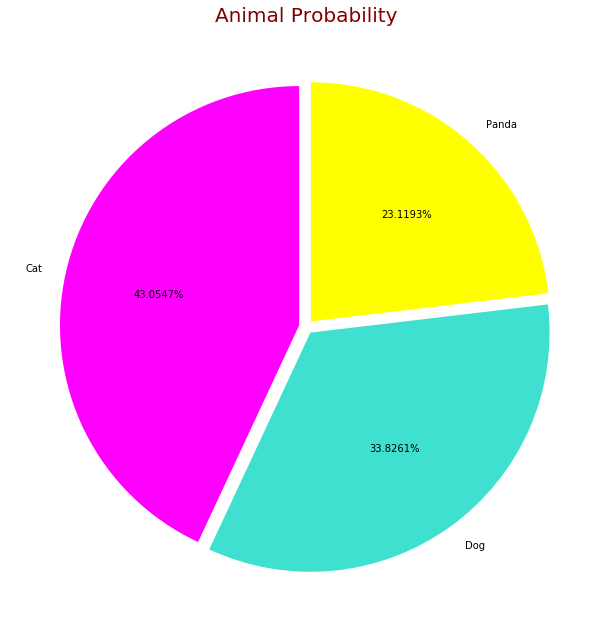

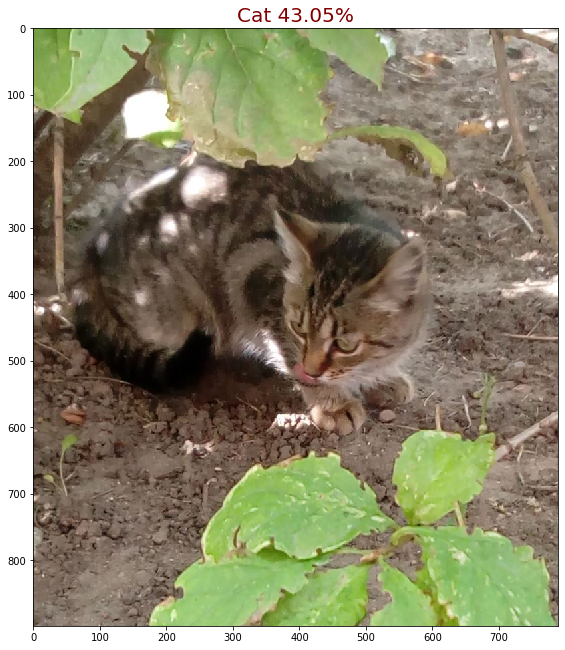

In [11]:
produce_result(check_path + 'Cat3.jpg')

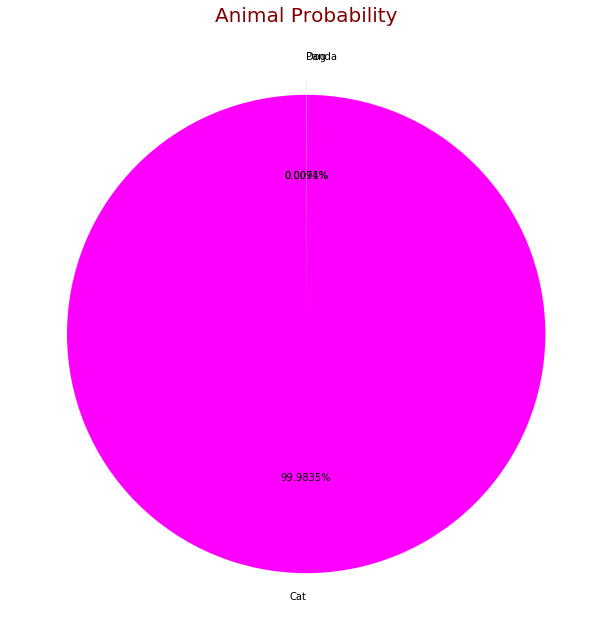

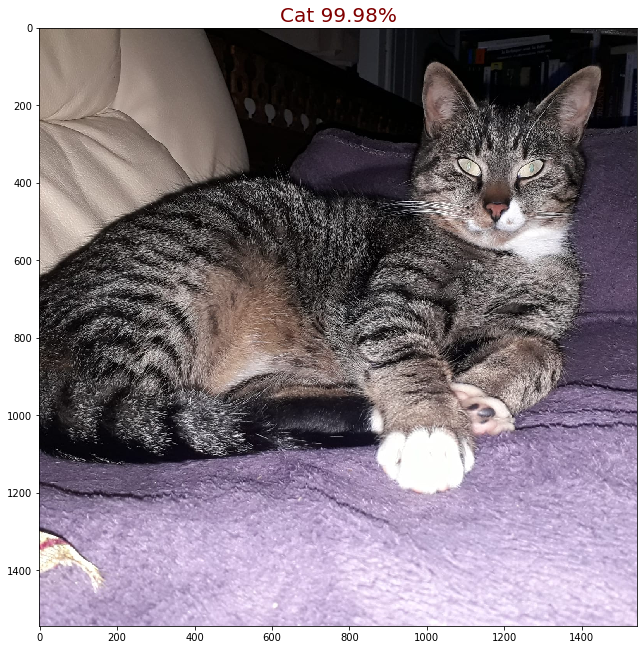

In [12]:
produce_result(check_path + 'Cat2.jpg')

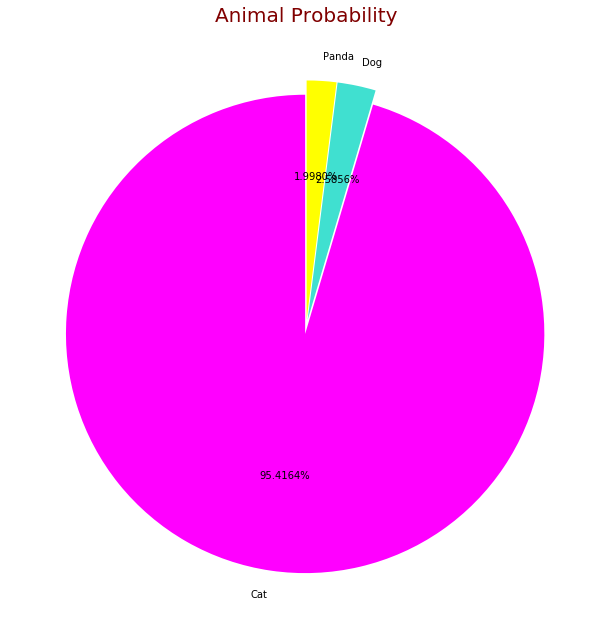

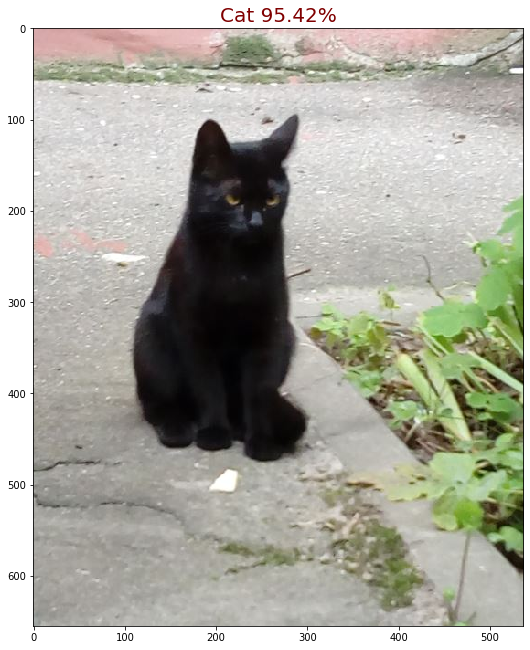

In [13]:
produce_result(check_path + 'Cat1.jpg')

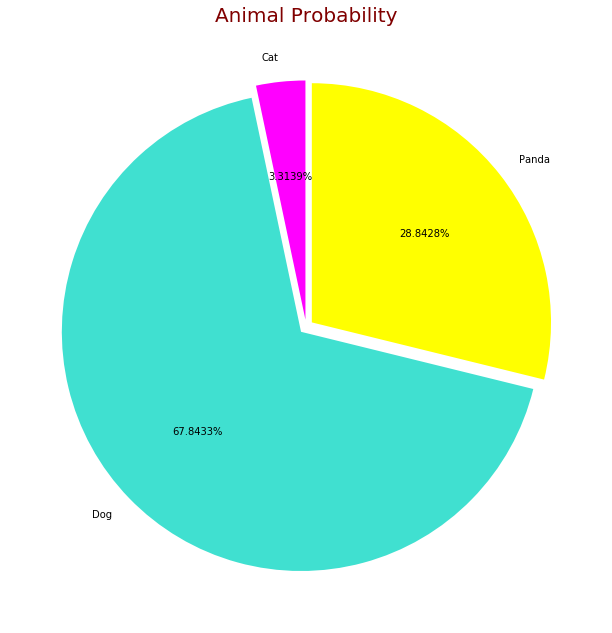

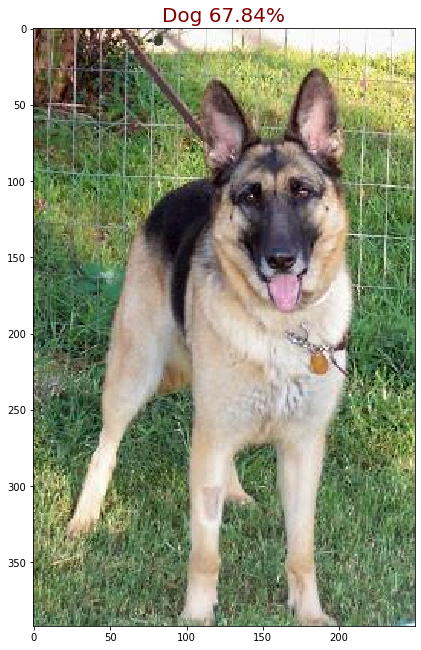

In [14]:
produce_result(check_path + 'Dog1.jpg')

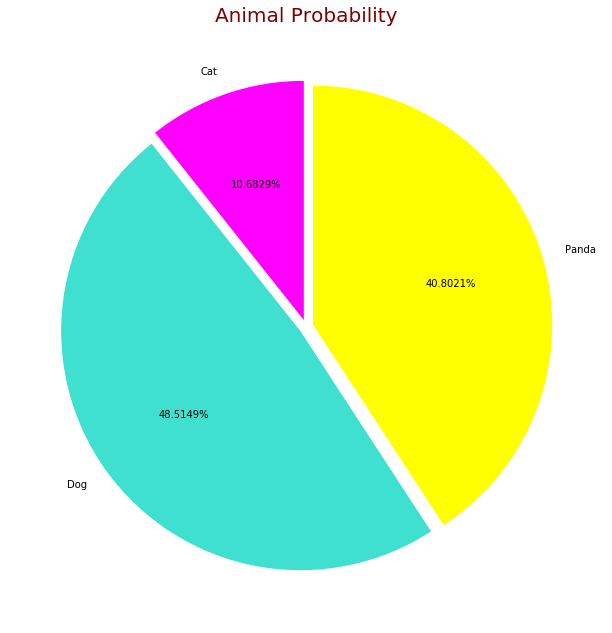

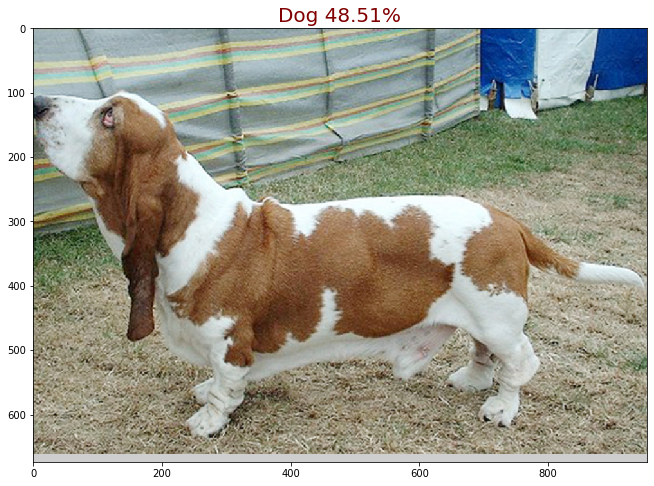

In [15]:
produce_result(check_path + 'Dog2.png')

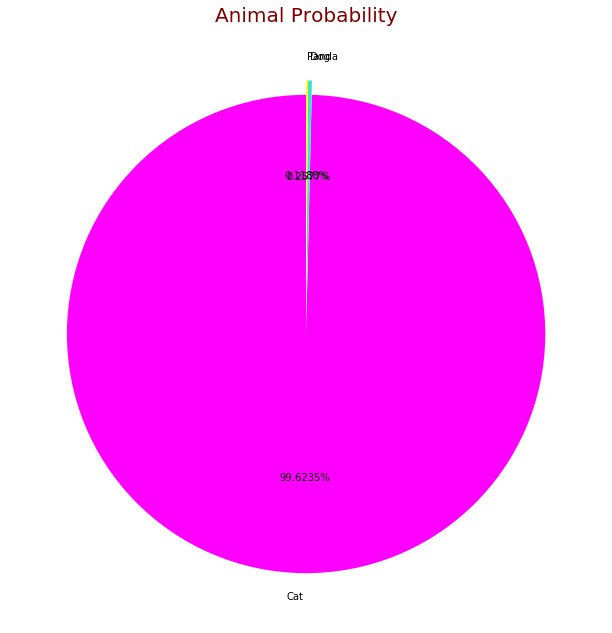

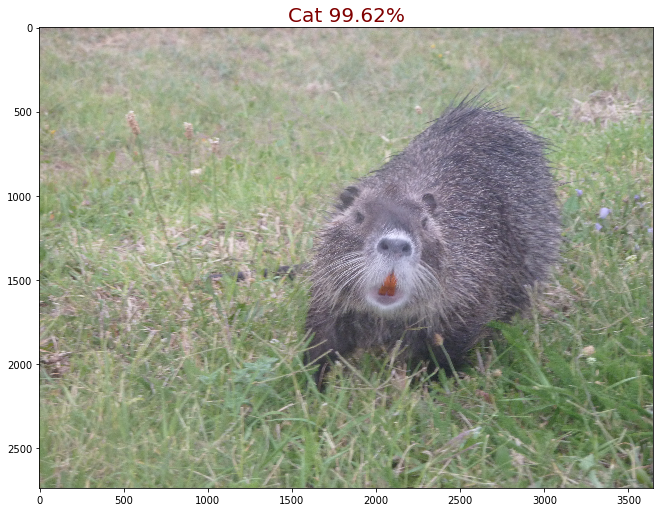

In [16]:
produce_result(check_path + 'Beaver.jpg')

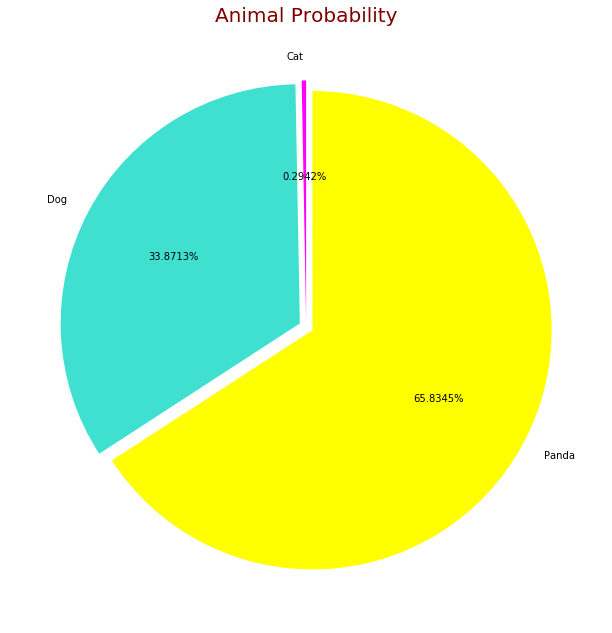

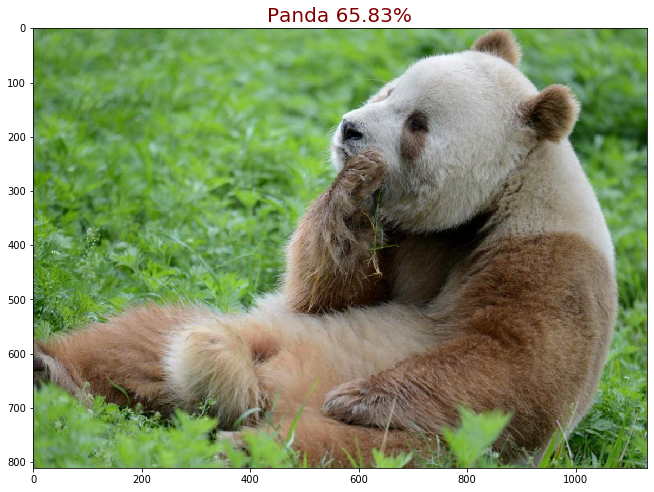

In [17]:
produce_result(check_path + 'Panda1.png')

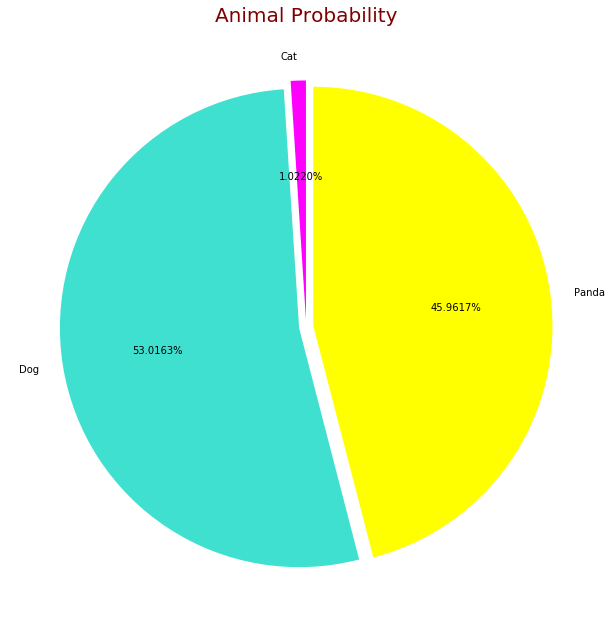

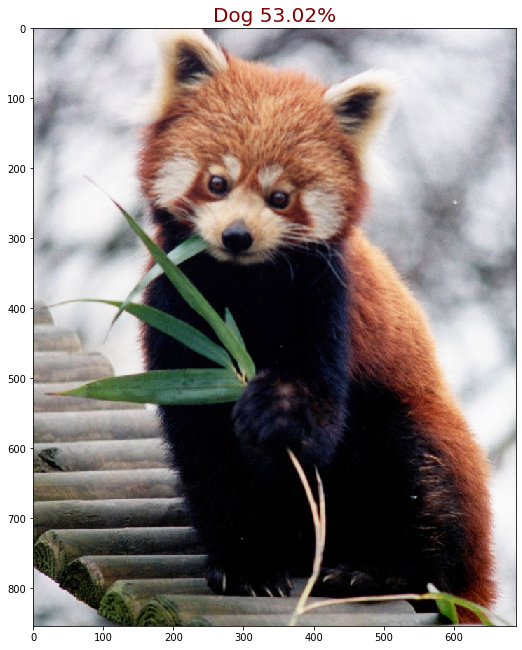

In [18]:
produce_result(check_path + 'Panda2.png')